In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [9]:
df = pd.read_excel('Data1.xlsx')
df.head()

,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,price_in_dollar,review_link,amazon_link,dimensions,ethernet,fingerprint_reader,service_rank,service_level,Unnamed: 31,Purpose
0,1,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,ASUS VivoBook S 15,ASUS,VivoBookS15,AMD Ryzen 9 6900HX,24906,AMD Radeon 680M,2000GB SSD,...,NaN,NaN,NaN,NaN,NaN,Fingerprint reader,5.0,80/100,NaN,Gaming and General use
1,2,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,HP OMEN 16,HP,OMEN16,Intel Core i7-12700H,26457,NVIDIA GeForce RTX 3050 Ti (Laptop),1000GB SSD,...,NaN,NaN,NaN,"369.06 x 247.90 x 23 mm (14.53"" x 9.76"" x 0.91"")","10, 100, 1000 Mbit/s",Fingerprint reader,9.0,63/100,NaN,"Gaming ,content creation and General use"
2,3,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,LG gram 17,LG,gram17,Intel Core i7-1360P,19277,Intel Iris Xe Graphics G7 (96EU),4000GB SSD,...,NaN,NaN,NaN,NaN,NaN,Fingerprint reader,NaN,NaN,NaN,"Gaming,Normal use and"
3,4,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,HP 15,HP,15,Intel Core i5-1135G7,9901,Intel Iris Xe Graphics G7 (80EU),2000GB SSD + 1000GB HDD,...,1890.0,https://laptopmedia.com/review/hp-15-15-dw1000...,https://www.amazon.com/exec/obidos/ASIN/B0CDRP...,NaN,"10, 100, 1000 Mbit/s",Fingerprint reader,9.0,63/100,NaN,"Normal,productivity,casual Gaming"
4,5,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,HP ENVY 17,HP,ENVY17,Intel Core i7-13700H,28201,NVIDIA GeForce RTX 3050 (Laptop),1000GB SSD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,63/100,NaN,"Normal,Gaming ,Media and Entertainament"


In [10]:
df.head()

,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,price_in_dollar,review_link,amazon_link,dimensions,ethernet,fingerprint_reader,service_rank,service_level,Unnamed: 31,Purpose
0,1,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,ASUS VivoBook S 15,ASUS,VivoBookS15,AMD Ryzen 9 6900HX,24906,AMD Radeon 680M,2000GB SSD,...,NaN,NaN,NaN,NaN,NaN,Fingerprint reader,5.0,80/100,NaN,Gaming and General use
1,2,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,HP OMEN 16,HP,OMEN16,Intel Core i7-12700H,26457,NVIDIA GeForce RTX 3050 Ti (Laptop),1000GB SSD,...,NaN,NaN,NaN,"369.06 x 247.90 x 23 mm (14.53"" x 9.76"" x 0.91"")","10, 100, 1000 Mbit/s",Fingerprint reader,9.0,63/100,NaN,"Gaming ,content creation and General use"
2,3,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,LG gram 17,LG,gram17,Intel Core i7-1360P,19277,Intel Iris Xe Graphics G7 (96EU),4000GB SSD,...,NaN,NaN,NaN,NaN,NaN,Fingerprint reader,NaN,NaN,NaN,"Gaming,Normal use and"
3,4,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,HP 15,HP,15,Intel Core i5-1135G7,9901,Intel Iris Xe Graphics G7 (80EU),2000GB SSD + 1000GB HDD,...,1890.0,https://laptopmedia.com/review/hp-15-15-dw1000...,https://www.amazon.com/exec/obidos/ASIN/B0CDRP...,NaN,"10, 100, 1000 Mbit/s",Fingerprint reader,9.0,63/100,NaN,"Normal,productivity,casual Gaming"
4,5,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,HP ENVY 17,HP,ENVY17,Intel Core i7-13700H,28201,NVIDIA GeForce RTX 3050 (Laptop),1000GB SSD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,63/100,NaN,"Normal,Gaming ,Media and Entertainament"


In [11]:
df.describe()

,laptop_id,cpu_mark,bluetooth_version,price_in_dollar,service_rank,Unnamed: 31
count,20.00000,20.000000,19.000000,6.000000,19.000000,0.0
mean,10.50000,9819.950000,4.457895,1224.525000,5.578947,NaN
std,5.91608,8374.180397,0.510246,466.842127,2.588775,NaN
min,1.00000,1109.000000,4.000000,528.180000,3.000000,NaN
25%,5.75000,3602.500000,4.100000,1024.247500,3.000000,NaN
50%,10.50000,6844.500000,4.100000,1209.990000,5.000000,NaN
75%,15.25000,11012.000000,5.000000,1462.490000,9.000000,NaN
max,20.00000,28201.000000,5.200000,1890.000000,9.000000,NaN


In [12]:
df.shape

(20, 33)

In [13]:
df.isnull().sum()

laptop_id                0
full_name_with_specs     0
link_profile             0
full_name                0
producer                 0
model                    0
cpu                      0
cpu_mark                 0
gpu                      0
disc                     0
ram                      0
ram_tech                11
display_size             1
display_resolution       1
display_hz              18
display_tech             1
weight                   0
hdmi_version             8
wifi_version             0
bluetooth_version        1
webcam_resolution        5
microphone_count         6
publishing_date          0
price_in_dollar         14
review_link             14
amazon_link             14
dimensions              18
ethernet                13
fingerprint_reader      10
service_rank             1
service_level            1
Unnamed: 31             20
Purpose                  1
dtype: int64

In [14]:
df.columns

Index(['laptop_id', 'full_name_with_specs', 'link_profile', 'full_name',
       'producer', 'model', 'cpu', 'cpu_mark', 'gpu', 'disc', 'ram',
       'ram_tech', 'display_size', 'display_resolution', 'display_hz',
       'display_tech', 'weight', 'hdmi_version', 'wifi_version',
       'bluetooth_version', 'webcam_resolution', 'microphone_count',
       'publishing_date', 'price_in_dollar', 'review_link', 'amazon_link',
       'dimensions', 'ethernet', 'fingerprint_reader', 'service_rank',
       'service_level', 'Unnamed: 31', 'Purpose'],
      dtype='object')

In [15]:
df.drop('service_rank', axis = 1, inplace = True)

In [16]:
df.columns

Index(['laptop_id', 'full_name_with_specs', 'link_profile', 'full_name',
       'producer', 'model', 'cpu', 'cpu_mark', 'gpu', 'disc', 'ram',
       'ram_tech', 'display_size', 'display_resolution', 'display_hz',
       'display_tech', 'weight', 'hdmi_version', 'wifi_version',
       'bluetooth_version', 'webcam_resolution', 'microphone_count',
       'publishing_date', 'price_in_dollar', 'review_link', 'amazon_link',
       'dimensions', 'ethernet', 'fingerprint_reader', 'service_level',
       'Unnamed: 31', 'Purpose'],
      dtype='object')

In [17]:
df["Unnamed: 31"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Unnamed: 31, dtype: float64

In [18]:
df.drop("Unnamed: 31", axis = 1, inplace = True)

In [19]:
df.isnull().sum()

laptop_id                0
full_name_with_specs     0
link_profile             0
full_name                0
producer                 0
model                    0
cpu                      0
cpu_mark                 0
gpu                      0
disc                     0
ram                      0
ram_tech                11
display_size             1
display_resolution       1
display_hz              18
display_tech             1
weight                   0
hdmi_version             8
wifi_version             0
bluetooth_version        1
webcam_resolution        5
microphone_count         6
publishing_date          0
price_in_dollar         14
review_link             14
amazon_link             14
dimensions              18
ethernet                13
fingerprint_reader      10
service_level            1
Purpose                  1
dtype: int64

In [20]:
df.drop("display_hz", axis = 1, inplace = True)

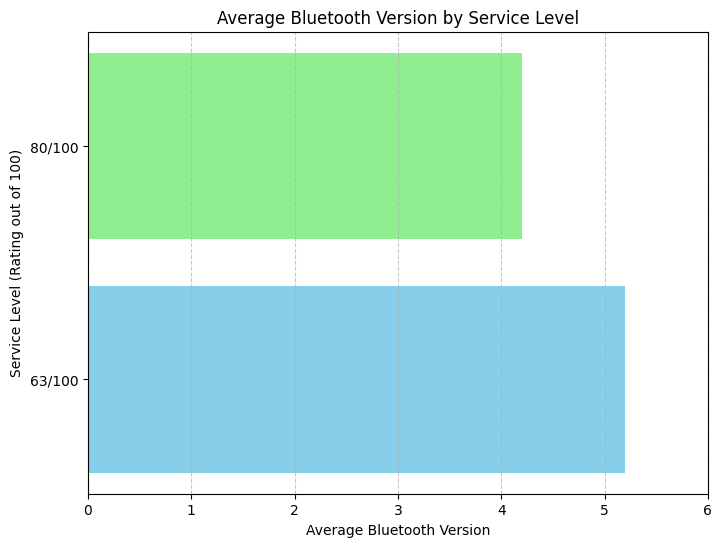

In [21]:
service_levels = ['63/100', '80/100']
average_bluetooth_versions = [5.2, 4.2]  
plt.figure(figsize=(8, 6))
plt.barh(service_levels, average_bluetooth_versions, color=['skyblue', 'lightgreen'])
plt.xlabel('Average Bluetooth Version')
plt.ylabel('Service Level (Rating out of 100)')
plt.title('Average Bluetooth Version by Service Level')
plt.xlim(0, 6)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


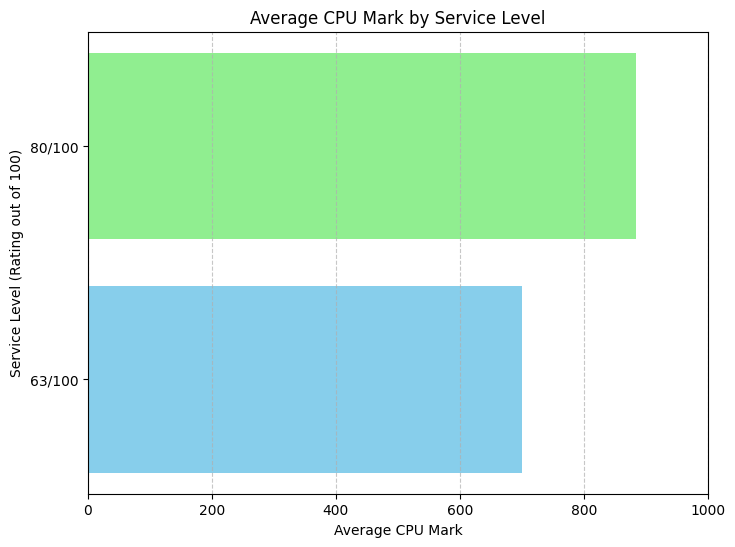

In [22]:
service_levels = ['63/100', '80/100']
cpu_marks = [[600, 700, 800], [800, 900, 950]]  
average_cpu_marks = [sum(marks) / len(marks) for marks in cpu_marks]
plt.figure(figsize=(8, 6))
plt.barh(service_levels, average_cpu_marks, color=['skyblue', 'lightgreen'])
plt.xlabel('Average CPU Mark')
plt.ylabel('Service Level (Rating out of 100)')
plt.title('Average CPU Mark by Service Level')
plt.xlim(0, 1000)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [23]:
df.isnull().sum()

laptop_id                0
full_name_with_specs     0
link_profile             0
full_name                0
producer                 0
model                    0
cpu                      0
cpu_mark                 0
gpu                      0
disc                     0
ram                      0
ram_tech                11
display_size             1
display_resolution       1
display_tech             1
weight                   0
hdmi_version             8
wifi_version             0
bluetooth_version        1
webcam_resolution        5
microphone_count         6
publishing_date          0
price_in_dollar         14
review_link             14
amazon_link             14
dimensions              18
ethernet                13
fingerprint_reader      10
service_level            1
Purpose                  1
dtype: int64

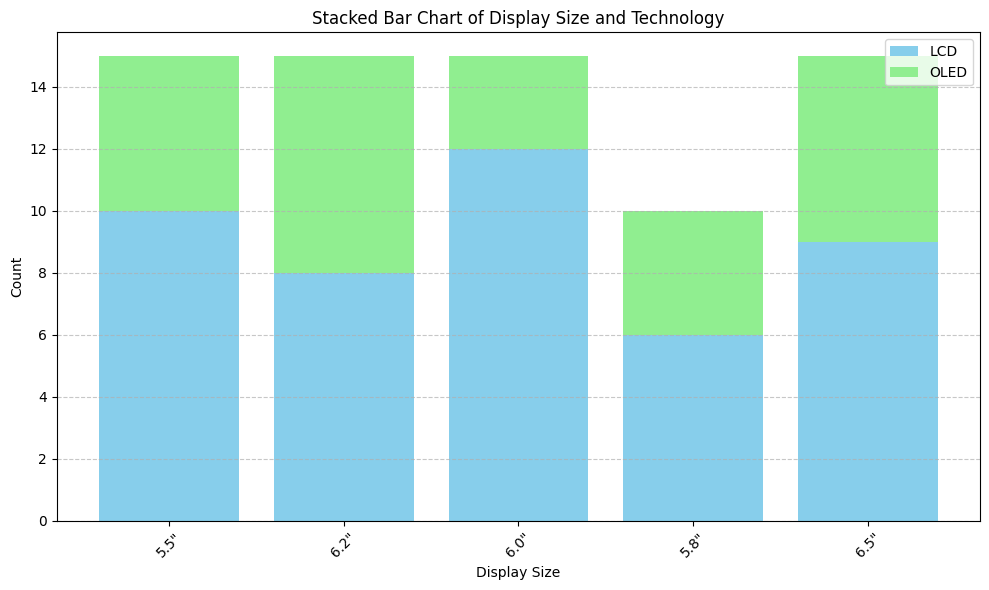

In [24]:
display_size = ['5.5"', '6.2"', '6.0"', '5.8"', '6.5"']
lcd_count = [10, 8, 12, 6, 9] 
oled_count = [5, 7, 3, 4, 6]   
plt.figure(figsize=(10, 6))
plt.bar(display_size, lcd_count, color='skyblue', label='LCD')
# Plotting OLED counts on top of LCD counts
plt.bar(display_size, oled_count, color='lightgreen', bottom=lcd_count, label='OLED')
plt.xlabel('Display Size')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Display Size and Technology')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


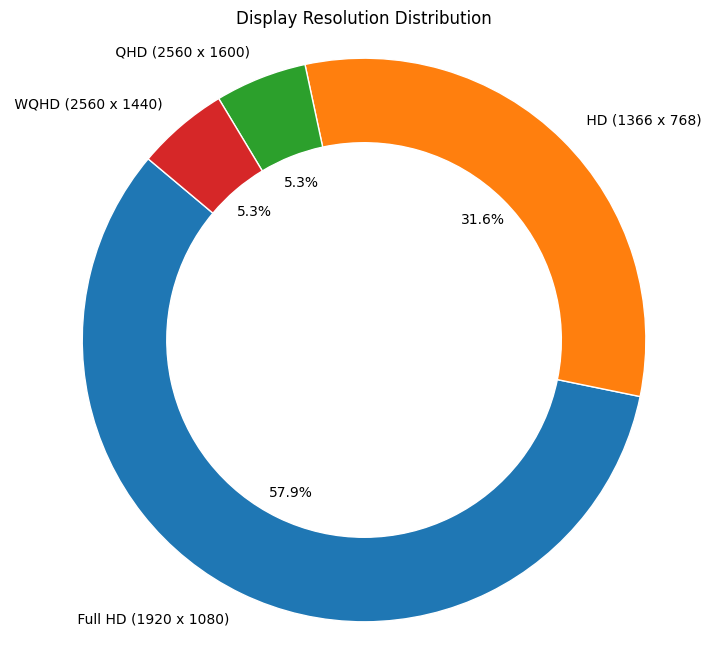

In [25]:
resolution_counts = df['display_resolution'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=140, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
plt.gca().add_artist(centre_circle)
plt.title('Display Resolution Distribution')
plt.axis('equal')  
plt.show()

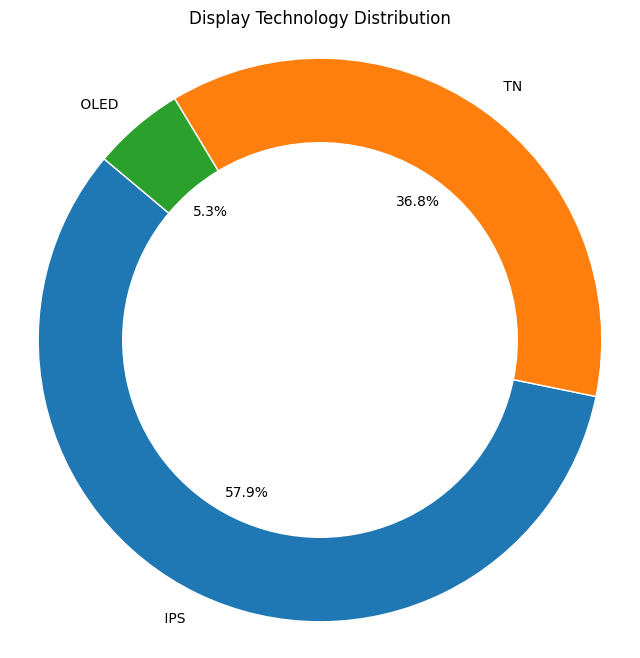

In [26]:
tech_counts = df['display_tech'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tech_counts, labels=tech_counts.index, autopct='%1.1f%%', startangle=140,radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
plt.gca().add_artist(centre_circle)
plt.title('Display Technology Distribution')
plt.axis('equal')  
plt.show()

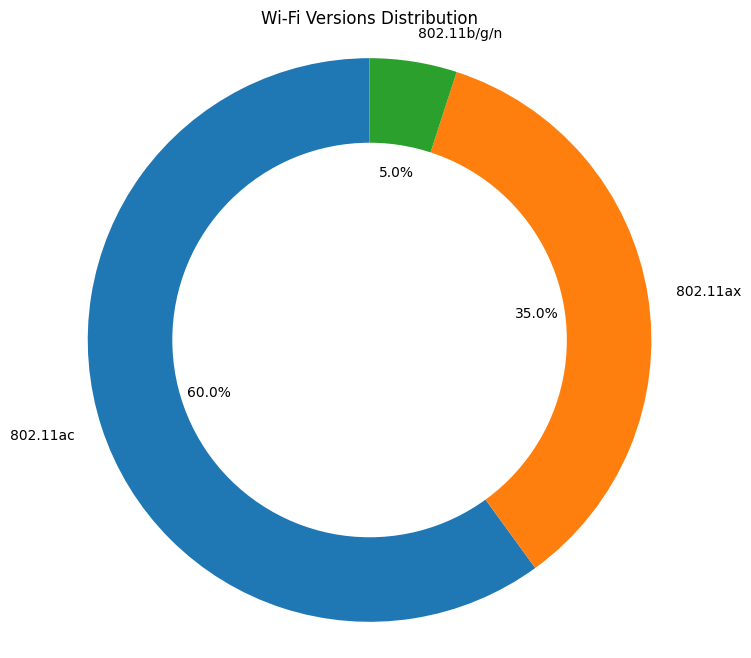

In [27]:
wifi_counts = df['wifi_version'].value_counts()
wifi_versions = wifi_counts.index.tolist()
sample_counts = wifi_counts.tolist()
plt.figure(figsize=(8, 8))
plt.pie(sample_counts, labels=wifi_versions, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))  # Draw a white circle to create the donut effect
plt.title('Wi-Fi Versions Distribution')
plt.axis('equal') 
plt.show()

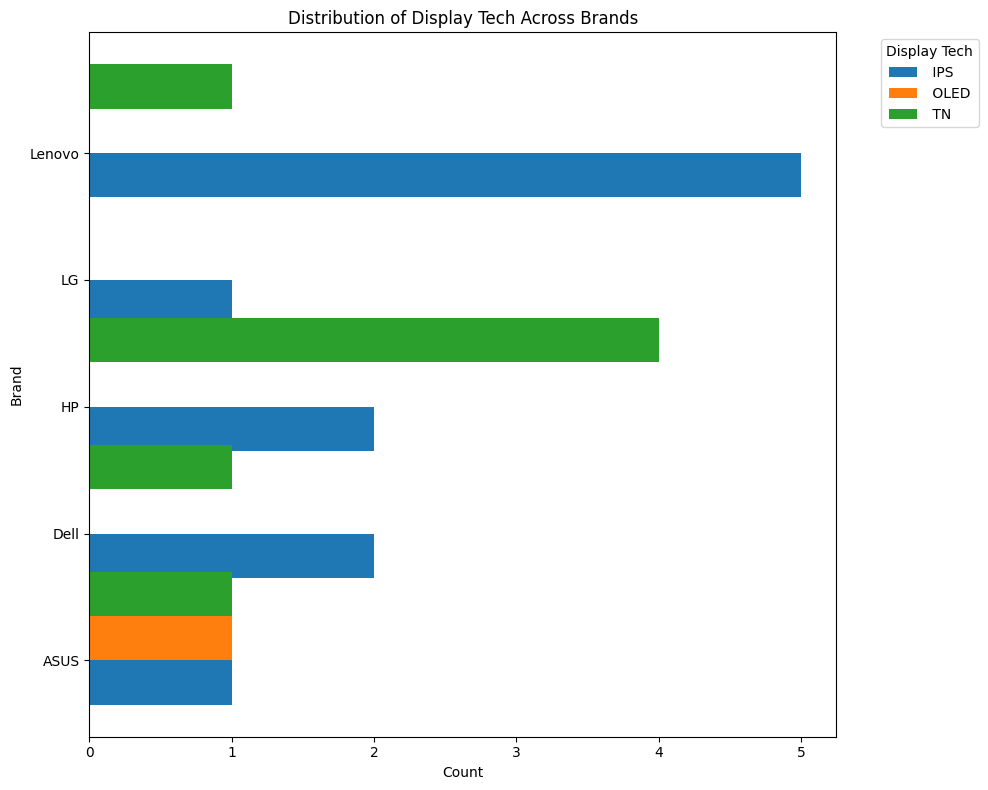

In [28]:
grouped = df.groupby(['producer', 'display_tech']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 8))
bar_height = 0.35  # Height of each bar
brands = grouped.index
y = range(len(brands))
for i, display_tech in enumerate(grouped.columns):
    ax.barh(y, grouped[display_tech], height=bar_height, label=display_tech)
    y = [pos + bar_height for pos in y]
ax.set_yticks([pos + bar_height / 2 for pos in range(len(brands))])
ax.set_yticklabels(brands)
plt.ylabel('Brand')
plt.xlabel('Count')
plt.title('Distribution of Display Tech Across Brands')
plt.legend(title='Display Tech', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

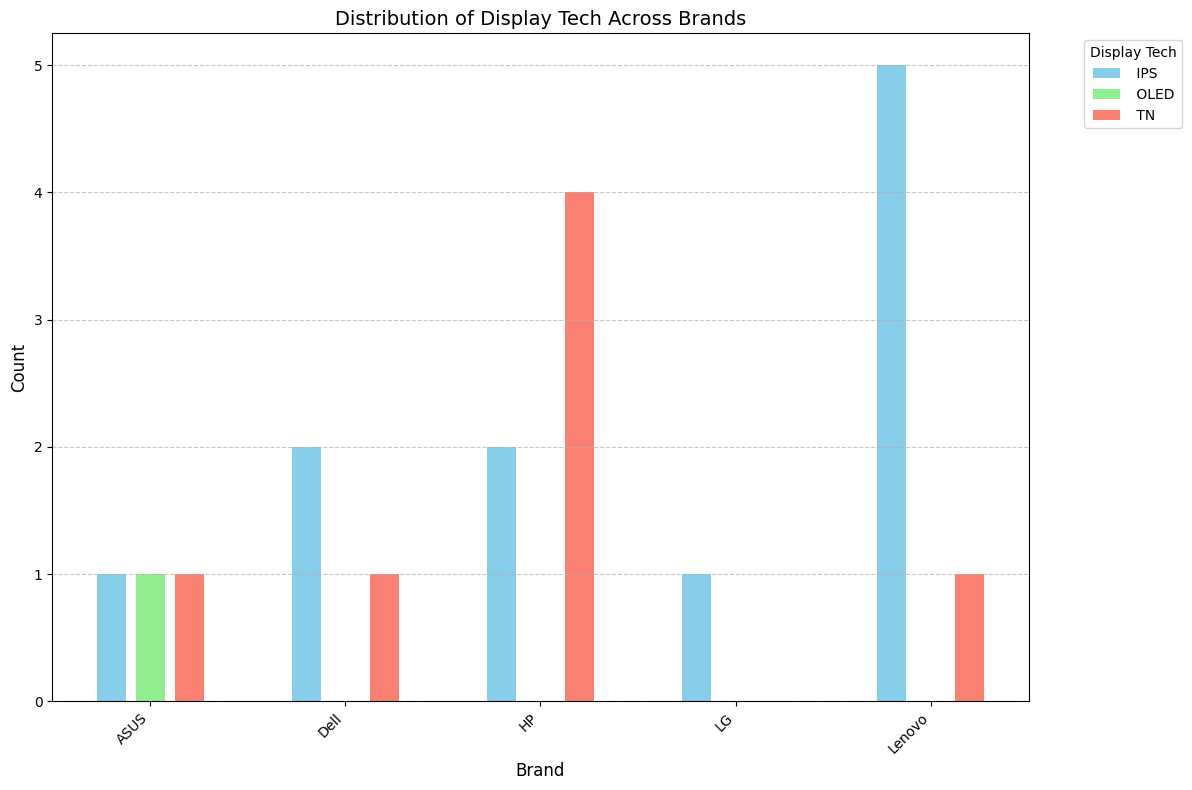

In [29]:
grouped = df.groupby(['producer', 'display_tech']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15  # Width of each bar
bar_gap = 0.05  # Gap between each brand's bars

# Get the list of brands and their corresponding index
brands = grouped.index
x = np.arange(len(brands))

# Define colors for each display technology
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightgray']

# Plot each brand's bars for each display technology as separate bars
for i, display_tech in enumerate(grouped.columns):
    ax.bar(x + i * (bar_width + bar_gap), grouped[display_tech], width=bar_width, label=display_tech, color=colors[i])

# Set x-axis ticks and labels with gaps
ax.set_xticks(x + ((len(grouped.columns) - 1) / 2) * (bar_width + bar_gap))
ax.set_xticklabels(brands, rotation=45, ha='right')

plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Display Tech Across Brands', fontsize=14)
plt.legend(title='Display Tech', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

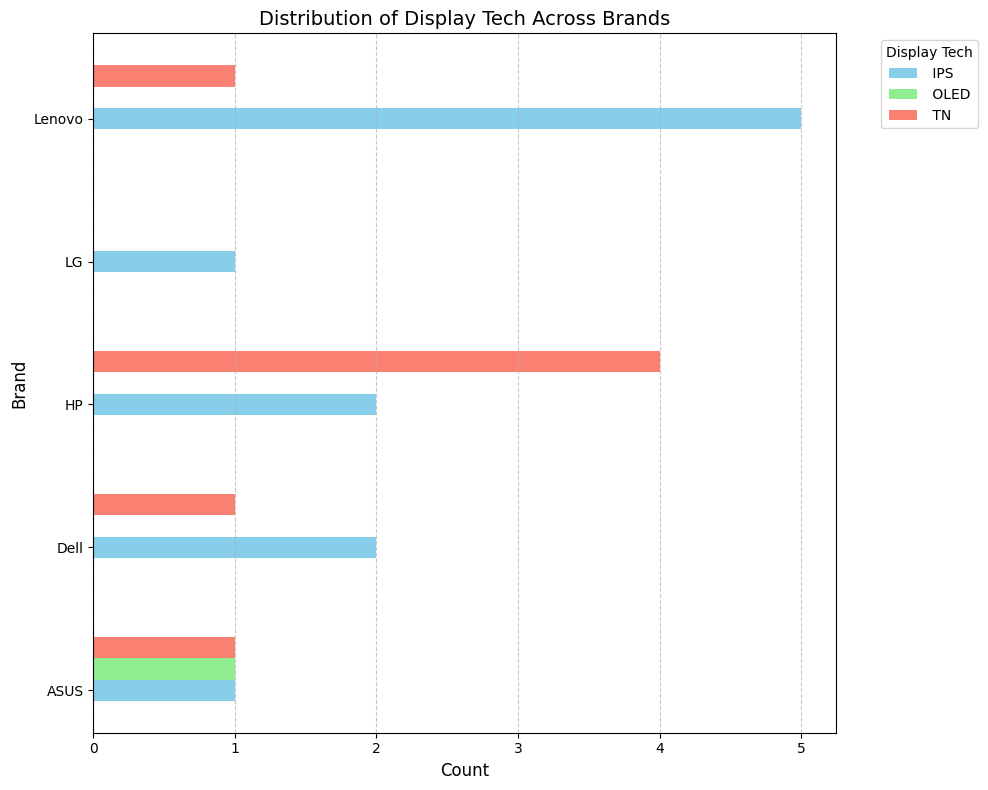

In [30]:
grouped = df.groupby(['producer', 'display_tech']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 8))
brands = grouped.index
y = np.arange(len(brands))
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightgray']
for i, display_tech in enumerate(grouped.columns):
    ax.barh(y + i * 0.15, grouped[display_tech], height=0.15, label=display_tech, color=colors[i])
ax.set_yticks(y)
ax.set_yticklabels(brands)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.title('Distribution of Display Tech Across Brands', fontsize=14)
plt.legend(title='Display Tech', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'tech1' is not defined

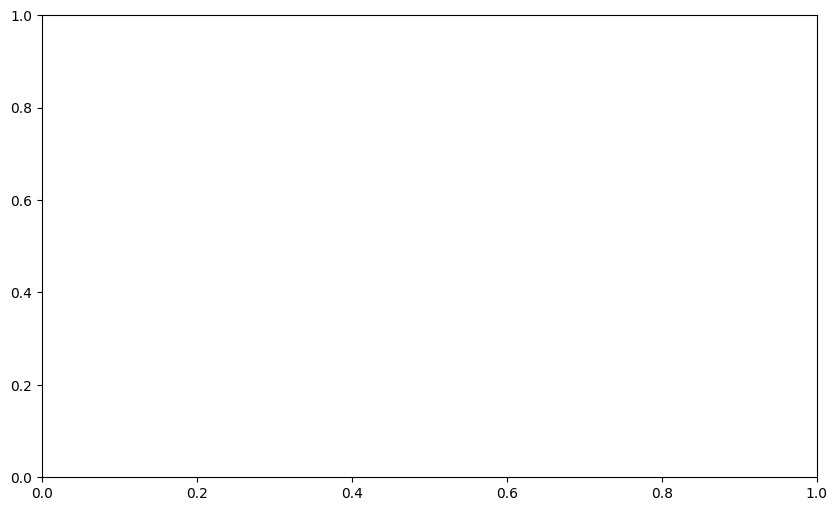

In [31]:
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(brands))
ax.barh(y - bar_width/2, tech1, label='Tech 1 (HD)', height=bar_width, color='b')
ax.barh(y + bar_width/2, tech2, label='Tech 2 (Full HD)', height=bar_width, color='g')
plt.ylabel('Brand')
plt.xlabel('Percentage')
plt.title('Distribution of Display Technologies by Brand')
plt.yticks(y, brands)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

laptop_id                0
full_name_with_specs     0
link_profile             0
full_name                0
producer                 0
model                    0
cpu                      0
cpu_mark                 0
gpu                      0
disc                     0
ram                      0
ram_tech                11
display_size             1
display_resolution       1
display_tech             1
weight                   0
hdmi_version             8
wifi_version             0
bluetooth_version        1
webcam_resolution        5
microphone_count         6
publishing_date          0
price_in_dollar         14
review_link             14
amazon_link             14
dimensions              18
ethernet                13
fingerprint_reader      10
service_level            1
Purpose                  1
dtype: int64

In [ ]:
columns_to_drop = ['price_in_dollar', 'review_link', 'amazon_link', 'dimensions', 'ethernet', 'fingerprint_reader','Purpose','ram_tech','link_profile', ]
X = df.drop(columns_to_drop, axis = 1)
Y = df["Purpose"]

In [ ]:
X

,laptop_id,full_name_with_specs,full_name,producer,model,cpu,cpu_mark,gpu,disc,ram,...,display_resolution,display_tech,weight,hdmi_version,wifi_version,bluetooth_version,webcam_resolution,microphone_count,publishing_date,service_level
0,1,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,ASUS VivoBook S 15,ASUS,VivoBookS15,AMD Ryzen 9 6900HX,24906,AMD Radeon 680M,2000GB SSD,32GB,...,Full HD (1920 x 1080),OLED,2,2.1,802.11ax,5.0,720p,1x Microphone,25.09.2023,80/100
1,2,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,HP OMEN 16,HP,OMEN16,Intel Core i7-12700H,26457,NVIDIA GeForce RTX 3050 Ti (Laptop),1000GB SSD,16GB,...,Full HD (1920 x 1080),IPS,2.41 kg (5.3 lbs),2.1,802.11ax,5.2,720p,2x Microphones,20.09.2023,63/100
2,3,LG gram 17ProcessorIntel Core i7-1360PInternal...,LG gram 17,LG,gram17,Intel Core i7-1360P,19277,Intel Iris Xe Graphics G7 (96EU),4000GB SSD,16GB,...,QHD (2560 x 1600),IPS,3.2 Gen 1 (5 Gbps),NaN,802.11ax,5.1,720p,2x Microphones,20.09.2023,NaN
3,4,HP 15ProcessorIntel Core i5-1135G7Internal mem...,HP 15,HP,15,Intel Core i5-1135G7,9901,Intel Iris Xe Graphics G7 (80EU),2000GB SSD + 1000GB HDD,32GB,...,HD (1366 x 768),TN,"358.5 x 242 x 19.9 mm (14.11"" x 9.53"" x 0.78"")",1.4b,802.11ac,4.2,720p,2x Microphones,17.10.2023,63/100
4,5,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,HP ENVY 17,HP,ENVY17,Intel Core i7-13700H,28201,NVIDIA GeForce RTX 3050 (Laptop),1000GB SSD,48GB,...,Full HD (1920 x 1080),IPS,3.2 Gen 2 (10 Gbps),2.1,802.11ax,5.2,720p,2x Microphones,17.10.2023,63/100
5,6,HP 15ProcessorIntel Core i3-1215UInternal memo...,HP 15,HP,15,Intel Core i3-1215U,11042,"Intel UHD Graphics (Alder Lake, 64EU)",512GB SSD,8GB,...,HD (1366 x 768),TN,3.2 Gen 1 (5 Gbps),1.4b,802.11ax,5.2,720p,2x Microphones,03.11.2023,63/100
6,7,Lenovo IdeaPad Gaming 3i 15ProcessorIntel Core...,Lenovo IdeaPad Gaming 3i 15,Lenovo,IdeaPadGaming3i15,Intel Core i5-11300H,11002,NVIDIA GeForce GTX 1650 (Laptop),1000GB SSD,32GB,...,Full HD (1920 x 1080),IPS,2.25 kg (5 lbs),2,802.11ax,5.0,720p,2x Microphones,02.11.2023,85/100
7,8,Dell Inspiron 15 5567ProcessorIntel Core i5-72...,Dell Inspiron 15 5567,Dell,Inspiron155567,Intel Core i5-7200U,3394,Intel HD Graphics 620,1000GB HDD,8GB,...,Full HD (1920 x 1080),IPS,2.30 kg (5.1 lbs),2,802.11ac,4.2,720p,NaN,02.12.2017,80/100
8,9,Lenovo Ideapad 320ProcessorAMD A12-9720PIntern...,Lenovo Ideapad 320,Lenovo,Ideapad320,AMD A12-9720P,2637,AMD Radeon R7 (Bristol Ridge),1000GB HDD,8GB,...,HD (1366 x 768),TN,2.20 kg (4.9 lbs),1.4b,802.11ac,4.1,720p,1x Microphone,14.12.2017,85/100
9,10,ASUS Chromebook C223ProcessorIntel Celeron N33...,ASUS Chromebook C223,ASUS,ChromebookC223,Intel Celeron N3350,1109,Intel HD Graphics 500 (Apollo Lake),32GB SSD,4GB,...,HD (1366 x 768),TN,"3.2 Gen 1 (5 Gbps), Power Delivery (PD), Displ...",NaN,802.11ac,4.0,NaN,NaN,16.04.2019,80/100


In [ ]:
Y

0                       Gaming and General use
1     Gaming ,content creation and General use
2                       Gaming,Normal use and 
3            Normal,productivity,casual Gaming
4      Normal,Gaming ,Media and Entertainament
5        Normal,Productivity,Media consumption
6                          Gaming,Everyday use
7                      Normal,productivity use
8               Normal use,basic Productivity 
9                         Normal,Education use
10                         Normal,Productivity
11                     Gaming and Multitasking
12                   Business and Prosuctivity
13                                  Normal use
14                Normal,Business,Productivity
15                   Business and Productivity
16                   Business and Productivity
17                Normal,Business,Productivity
18                   Business and Productivity
19                                         NaN
Name: Purpose, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
string_columns = ['full_name', 'producer', 'cpu', 'gpu', 'disc', 'display_tech', 'wifi_version', 'bluetooth_version']
label_encoder = LabelEncoder()
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data
# Select columns with string data
string_columns = ['full_name', 'producer', 'cpu', 'gpu', 'disc', 'display_tech', 'wifi_version', 'bluetooth_version']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each string column and transform the string values to numerical labels
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert numerical columns to categorical and then to numerical codes
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].astype('category').cat.codes

# Now, all the string data and numerical data are mapped to numerical labels


In [ ]:
X

,laptop_id,full_name_with_specs,full_name,producer,model,cpu,cpu_mark,gpu,disc,ram,...,display_resolution,display_tech,weight,hdmi_version,wifi_version,bluetooth_version,webcam_resolution,microphone_count,publishing_date,service_level
0,1,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,ASUS VivoBook S 15,ASUS,VivoBookS15,AMD Ryzen 9 6900HX,24906,AMD Radeon 680M,2000GB SSD,32GB,...,Full HD (1920 x 1080),OLED,2,2.1,802.11ax,5.0,720p,1x Microphone,25.09.2023,80/100
1,2,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,HP OMEN 16,HP,OMEN16,Intel Core i7-12700H,26457,NVIDIA GeForce RTX 3050 Ti (Laptop),1000GB SSD,16GB,...,Full HD (1920 x 1080),IPS,2.41 kg (5.3 lbs),2.1,802.11ax,5.2,720p,2x Microphones,20.09.2023,63/100
2,3,LG gram 17ProcessorIntel Core i7-1360PInternal...,LG gram 17,LG,gram17,Intel Core i7-1360P,19277,Intel Iris Xe Graphics G7 (96EU),4000GB SSD,16GB,...,QHD (2560 x 1600),IPS,3.2 Gen 1 (5 Gbps),NaN,802.11ax,5.1,720p,2x Microphones,20.09.2023,NaN
3,4,HP 15ProcessorIntel Core i5-1135G7Internal mem...,HP 15,HP,15,Intel Core i5-1135G7,9901,Intel Iris Xe Graphics G7 (80EU),2000GB SSD + 1000GB HDD,32GB,...,HD (1366 x 768),TN,"358.5 x 242 x 19.9 mm (14.11"" x 9.53"" x 0.78"")",1.4b,802.11ac,4.2,720p,2x Microphones,17.10.2023,63/100
4,5,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,HP ENVY 17,HP,ENVY17,Intel Core i7-13700H,28201,NVIDIA GeForce RTX 3050 (Laptop),1000GB SSD,48GB,...,Full HD (1920 x 1080),IPS,3.2 Gen 2 (10 Gbps),2.1,802.11ax,5.2,720p,2x Microphones,17.10.2023,63/100
5,6,HP 15ProcessorIntel Core i3-1215UInternal memo...,HP 15,HP,15,Intel Core i3-1215U,11042,"Intel UHD Graphics (Alder Lake, 64EU)",512GB SSD,8GB,...,HD (1366 x 768),TN,3.2 Gen 1 (5 Gbps),1.4b,802.11ax,5.2,720p,2x Microphones,03.11.2023,63/100
6,7,Lenovo IdeaPad Gaming 3i 15ProcessorIntel Core...,Lenovo IdeaPad Gaming 3i 15,Lenovo,IdeaPadGaming3i15,Intel Core i5-11300H,11002,NVIDIA GeForce GTX 1650 (Laptop),1000GB SSD,32GB,...,Full HD (1920 x 1080),IPS,2.25 kg (5 lbs),2,802.11ax,5.0,720p,2x Microphones,02.11.2023,85/100
7,8,Dell Inspiron 15 5567ProcessorIntel Core i5-72...,Dell Inspiron 15 5567,Dell,Inspiron155567,Intel Core i5-7200U,3394,Intel HD Graphics 620,1000GB HDD,8GB,...,Full HD (1920 x 1080),IPS,2.30 kg (5.1 lbs),2,802.11ac,4.2,720p,NaN,02.12.2017,80/100
8,9,Lenovo Ideapad 320ProcessorAMD A12-9720PIntern...,Lenovo Ideapad 320,Lenovo,Ideapad320,AMD A12-9720P,2637,AMD Radeon R7 (Bristol Ridge),1000GB HDD,8GB,...,HD (1366 x 768),TN,2.20 kg (4.9 lbs),1.4b,802.11ac,4.1,720p,1x Microphone,14.12.2017,85/100
9,10,ASUS Chromebook C223ProcessorIntel Celeron N33...,ASUS Chromebook C223,ASUS,ChromebookC223,Intel Celeron N3350,1109,Intel HD Graphics 500 (Apollo Lake),32GB SSD,4GB,...,HD (1366 x 768),TN,"3.2 Gen 1 (5 Gbps), Power Delivery (PD), Displ...",NaN,802.11ac,4.0,NaN,NaN,16.04.2019,80/100


In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, Y_test.shape)

(20, 21) (18, 21) (2,)


In [ ]:
model = RandomForestClassifier()

In [ ]:
# model.fit(X_train, Y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the list of CPU names
# cpu_names = [
#     'AMD Ryzen 9 6900HX', 'Intel Core i7-12700H', 'Intel Core i7-1360P',
#     'Intel Core i5-1135G7', 'Intel Core i7-13700H', 'Intel Core i3-1215U',
#     'Intel Core i5-11300H', 'Intel Core i5-7200U', 'AMD A12-9720P',
#     'Intel Celeron N3350', 'Intel Core i7-8550U', 'Intel Core i7-9750H',
#     'Intel Core i7-7600U', 'Intel Core i5-7200U', 'Intel Core i5-1035G1',
#     'Intel Core i5-8350U', 'Intel Core i7-7600U', 'Intel Core i7-7500U',
#     'Intel Core i7-6600U', 'Intel Core i7-8750H'
# ]
cpu_names = df["cpu"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform CPU names to numerical labels
encoded_cpu_labels = label_encoder.fit_transform(cpu_names)

# Create a dictionary to map CPU names to numerical labels
cpu_name_to_label = {cpu: label for cpu, label in zip(cpu_names, encoded_cpu_labels)}

# Print the mapping of CPU names to numerical labels
for cpu, label in cpu_name_to_label.items():
    print(f"{cpu}: {label}")


1: 1
9: 9
10: 10
6: 6
11: 11
3: 3
5: 5
7: 7
0: 0
2: 2
15: 15
17: 17
14: 14
4: 4
8: 8
13: 13
12: 12
16: 16


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Define the list of CPU names
cpu_names = df["cpu"]
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform CPU names to numerical labels
encoded_cpu_labels = label_encoder.fit_transform(cpu_names)

# Create a dictionary to map CPU names to numerical labels
cpu_name_to_label = {cpu: label for cpu, label in zip(cpu_names, encoded_cpu_labels)}

# Map CPU names in the dataset to numerical labels
df['cpu_label'] = df['cpu'].map(cpu_name_to_label)
df.head()


,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,publishing_date,price_in_dollar,review_link,amazon_link,dimensions,ethernet,fingerprint_reader,service_level,Purpose,cpu_label
0,0,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,1,0,VivoBookS15,1,15,0,3,...,25.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,80/100,Gaming and General use,1
1,1,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,10,3,OMEN16,9,16,14,1,...,20.09.2023,-1,NaN,NaN,"369.06 x 247.90 x 23 mm (14.53"" x 9.76"" x 0.91"")","10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Gaming ,content creation and General use",9
2,2,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,11,4,gram17,10,14,6,7,...,20.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,NaN,"Gaming,Normal use and",10
3,3,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,7,3,15,6,9,5,4,...,17.10.2023,5,https://laptopmedia.com/review/hp-15-15-dw1000...,https://www.amazon.com/exec/obidos/ASIN/B0CDRP...,NaN,"10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Normal,productivity,casual Gaming",6
4,4,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,9,3,ENVY17,11,17,13,1,...,17.10.2023,-1,NaN,NaN,NaN,NaN,NaN,63/100,"Normal,Gaming ,Media and Entertainament",11


In [ ]:
cpu_names = df["cpu"]
cpu_name_to_label = {cpu_name: i for i, cpu_name in enumerate(set(cpu_names))}
with open('cpu_name_mapping.pkl', 'wb') as f:
    pickle.dump(cpu_name_to_label, f)


In [ ]:
with open('cpu_name_mapping.pkl', 'rb') as f:
    cpu_name_to_label = pickle.load(f)

In [ ]:
ram_values = df["ram"]
df1 = pd.DataFrame({'RAM': ram_values})
df1['RAM'] = df1['RAM'].str.replace('GB', '')
df1

,RAM
0,32
1,16
2,16
3,32
4,48
5,8
6,32
7,8
8,8
9,4


In [ ]:
df.head()

,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,publishing_date,price_in_dollar,review_link,amazon_link,dimensions,ethernet,fingerprint_reader,service_level,Purpose,cpu_label
0,0,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,1,0,VivoBookS15,1,15,0,3,...,25.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,80/100,Gaming and General use,1
1,1,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,10,3,OMEN16,9,16,14,1,...,20.09.2023,-1,NaN,NaN,"369.06 x 247.90 x 23 mm (14.53"" x 9.76"" x 0.91"")","10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Gaming ,content creation and General use",9
2,2,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,11,4,gram17,10,14,6,7,...,20.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,NaN,"Gaming,Normal use and",10
3,3,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,7,3,15,6,9,5,4,...,17.10.2023,5,https://laptopmedia.com/review/hp-15-15-dw1000...,https://www.amazon.com/exec/obidos/ASIN/B0CDRP...,NaN,"10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Normal,productivity,casual Gaming",6
4,4,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,9,3,ENVY17,11,17,13,1,...,17.10.2023,-1,NaN,NaN,NaN,NaN,NaN,63/100,"Normal,Gaming ,Media and Entertainament",11


In [ ]:
ram_values = df["ram"]
ram_values_without_gb = [value.replace('GB', '') for value in ram_values]
df.head()


,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,publishing_date,price_in_dollar,review_link,amazon_link,dimensions,ethernet,fingerprint_reader,service_level,Purpose,cpu_label
0,0,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,1,0,VivoBookS15,1,15,0,3,...,25.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,80/100,Gaming and General use,1
1,1,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,10,3,OMEN16,9,16,14,1,...,20.09.2023,-1,NaN,NaN,"369.06 x 247.90 x 23 mm (14.53"" x 9.76"" x 0.91"")","10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Gaming ,content creation and General use",9
2,2,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,11,4,gram17,10,14,6,7,...,20.09.2023,-1,NaN,NaN,NaN,NaN,Fingerprint reader,NaN,"Gaming,Normal use and",10
3,3,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,7,3,15,6,9,5,4,...,17.10.2023,5,https://laptopmedia.com/review/hp-15-15-dw1000...,https://www.amazon.com/exec/obidos/ASIN/B0CDRP...,NaN,"10, 100, 1000 Mbit/s",Fingerprint reader,63/100,"Normal,productivity,casual Gaming",6
4,4,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,9,3,ENVY17,11,17,13,1,...,17.10.2023,-1,NaN,NaN,NaN,NaN,NaN,63/100,"Normal,Gaming ,Media and Entertainament",11


In [ ]:
df.columns

Index(['laptop_id', 'full_name_with_specs', 'link_profile', 'full_name',
       'producer', 'model', 'cpu', 'cpu_mark', 'gpu', 'disc', 'ram',
       'ram_tech', 'display_size', 'display_resolution', 'display_tech',
       'weight', 'hdmi_version', 'wifi_version', 'bluetooth_version',
       'webcam_resolution', 'microphone_count', 'publishing_date',
       'price_in_dollar', 'review_link', 'amazon_link', 'dimensions',
       'ethernet', 'fingerprint_reader', 'service_level', 'Purpose',
       'cpu_label'],
      dtype='object')

In [ ]:
df['ram']

0     32GB
1     16GB
2     16GB
3     32GB
4     48GB
5      8GB
6     32GB
7      8GB
8      8GB
9      4GB
10     8GB
11     8GB
12     8GB
13     8GB
14     8GB
15    16GB
16     8GB
17     8GB
18    16GB
19    32GB
Name: ram, dtype: object

In [ ]:
# Assuming your main DataFrame is named df_main
df['ram'] = df['ram'].str.replace('GB', '').astype(int)


In [ ]:
df["ram"]

0     32
1     16
2     16
3     32
4     48
5      8
6     32
7      8
8      8
9      4
10     8
11     8
12     8
13     8
14     8
15    16
16     8
17     8
18    16
19    32
Name: ram, dtype: int32

In [ ]:
# Assuming df is your DataFrame
df['SSD'] = None  # Create an empty column named "SSD"
df['HDD'] = None  # Create an empty column named "HDD"
df["Disc_Value"] = df["disc"]


In [ ]:
df["display_tech"]

0     1
1     0
2     0
3     2
4     0
5     2
6     0
7     0
8     2
9     2
10    0
11    3
12    0
13    2
14    0
15    0
16    2
17    2
18    0
19    0
Name: display_tech, dtype: int8

In [ ]:
df.columns

Index(['laptop_id', 'full_name_with_specs', 'link_profile', 'full_name',
       'producer', 'model', 'cpu', 'cpu_mark', 'gpu', 'disc', 'ram',
       'ram_tech', 'display_size', 'display_resolution', 'display_tech',
       'weight', 'hdmi_version', 'wifi_version', 'bluetooth_version',
       'webcam_resolution', 'microphone_count', 'publishing_date',
       'price_in_dollar', 'review_link', 'amazon_link', 'dimensions',
       'ethernet', 'fingerprint_reader', 'service_level', 'Purpose',
       'cpu_label', 'SSD', 'HDD', 'Disc_Value'],
      dtype='object')

In [ ]:
df['service_level'] = df['service_level'].apply(lambda x: sum(map(int, x.split('/'))) / 2 if isinstance(x, str) else x)
df['service_level']

0     90.0
1     81.5
2      NaN
3     81.5
4     81.5
5     81.5
6     92.5
7     90.0
8     92.5
9     90.0
10    92.5
11    86.5
12    92.5
13    81.5
14    90.0
15    92.5
16    90.0
17    81.5
18    92.5
19    90.0
Name: service_level, dtype: float64

In [ ]:
df["Gaming"] = None
df["Productivity"] = None
df["Normal use"] = None
df["content creation"] = None
df["Everyday use"] = None
df["Education"] = None
df["Business"] = None
df["Multitasking"] = None


In [ ]:
# Define a function to map values to 0 or 1 based on the presence of specific strings in the "Purpose" column
def map_purpose_to_binary(purpose, keyword):
    if isinstance(purpose, str) and keyword in purpose:
        return 1
    else:
        return 0

# Apply the mapping function to each column in the list
for column in columns_to_map:
    df[column] = df['Purpose'].apply(lambda x: map_purpose_to_binary(x, column))

df

,laptop_id,full_name_with_specs,link_profile,full_name,producer,model,cpu,cpu_mark,gpu,disc,...,HDD,Disc_Value,Gaming,Productivity,Normal use,content creation,Everyday use,Education,Business,Multitasking
0,0,ASUS VivoBook S 15ProcessorAMD Ryzen 9 6900HXI...,https://laptopmedia.com/laptop-specs/asus-vivo...,1,0,VivoBookS15,1,15,0,3,...,None,3,1,0,0,0,0,0,0,0
1,1,HP OMEN 16ProcessorIntel Core i7-12700HInterna...,https://laptopmedia.com/laptop-specs/hp-omen-1...,10,3,OMEN16,9,16,14,1,...,None,1,1,0,0,1,0,0,0,0
2,2,LG gram 17ProcessorIntel Core i7-1360PInternal...,https://laptopmedia.com/laptop-specs/lg-gram-1...,11,4,gram17,10,14,6,7,...,None,7,1,0,1,0,0,0,0,0
3,3,HP 15ProcessorIntel Core i5-1135G7Internal mem...,https://laptopmedia.com/laptop-specs/hp-15-17220/,7,3,15,6,9,5,4,...,None,4,1,0,0,0,0,0,0,0
4,4,HP ENVY 17ProcessorIntel Core i7-13700HInterna...,https://laptopmedia.com/laptop-specs/hp-envy-1...,9,3,ENVY17,11,17,13,1,...,None,1,1,0,0,0,0,0,0,0
5,5,HP 15ProcessorIntel Core i3-1215UInternal memo...,https://laptopmedia.com/laptop-specs/hp-15-17833/,7,3,15,3,13,7,8,...,None,8,0,1,0,0,0,0,0,0
6,6,Lenovo IdeaPad Gaming 3i 15ProcessorIntel Core...,https://laptopmedia.com/laptop-specs/lenovo-id...,12,5,IdeaPadGaming3i15,5,12,12,1,...,None,1,1,0,0,0,1,0,0,0
7,7,Dell Inspiron 15 5567ProcessorIntel Core i5-72...,https://laptopmedia.com/laptop-specs/dell-insp...,5,2,Inspiron155567,7,2,4,0,...,None,0,0,0,0,0,0,0,0,0
8,8,Lenovo Ideapad 320ProcessorAMD A12-9720PIntern...,https://laptopmedia.com/laptop-specs/lenovo-id...,13,5,Ideapad320,0,1,1,0,...,None,0,0,1,1,0,0,0,0,0
9,9,ASUS Chromebook C223ProcessorIntel Celeron N33...,https://laptopmedia.com/laptop-specs/asus-chro...,0,0,ChromebookC223,2,0,2,6,...,None,6,0,0,0,0,0,1,0,0


In [ ]:
columns_to_drop = ['price_in_dollar', 'review_link', 'amazon_link',"Purpose", "display_resolution",'dimensions', 'ethernet', 'fingerprint_reader','ram_tech','hdmi_version','wifi_version','display_size' ,'bluetooth_version','webcam_resolution', 'microphone_count','weight' ,'publishing_date','model','full_name_with_specs', 'link_profile', 'full_name']
X = df.drop(columns_to_drop, axis = 1)
Y = df["full_name_with_specs"]

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, Y_test.shape)

(20, 21) (18, 21) (2,)


In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction = model.predict(X_train)
Accuracy_of_training_data = accuracy_score(Y_train, X_train_prediction)
Accuracy_of_training_data

1.0

In [ ]:
X_test_prediction = model.predict(X_test)
Accuracy_of_testing_data = accuracy_score(Y_test, X_test_prediction)
Accuracy_of_testing_data

0.0